In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
#Read the dataset 
iris=pd.read_csv('Iris.csv')
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris.shape
iris['species'].value_counts()
iris.columns
iris.values

KeyError: 'species'

In [ ]:
iris.info()
iris.describe(include='all')

In [5]:
X=iris.iloc[:,:4]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [6]:
y=iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [7]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 ],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 ],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 ]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
y_test.shape

(45,)

In [9]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_predict1=knnmodel.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
acc=accuracy_score(y_test,y_predict1)
acc

1.0

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]], dtype=int64)

In [14]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,18,0
virginica,0,0,13


In [15]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [16]:
prediction_output.transpose()

,y_test,y_predict1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [17]:
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [18]:
print(mean_acc)

[1.         0.97777778 1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.97777778
 1.         0.97777778 0.97777778 0.97777778 1.         1.
 1.         1.         1.         0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.95555556 0.95555556 0.93333333 0.93333333 0.93333333 0.93333333
 0.88888889]


In [19]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


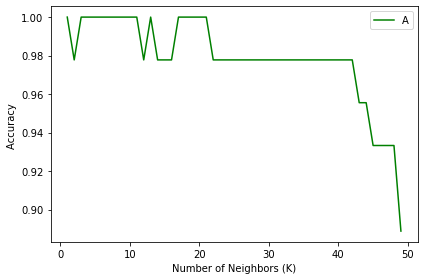

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()